# Imadjust function and Local Contrast in MATLAB's python alternative

## Using dicom images


In [3]:
import cv2 as cv
import numpy as np
import pydicom as dicom
from matplotlib import pyplot as plt
import math

In [4]:
!ls

Gaussian blur_1.png               adjustedimage.png
IM15UD.dcm                        adjustedimage1.dcm
IM15UD.jpg                        adjustedimage1.png
IM19OP.png                        dcm.png
IM19UD.dcm                        fig1.png
IM21UD.dcm                        imadjust_try.ipynb
IM25OP.png                        img15_blur.dcm
IM25UD.dcm                        img1_1.DCM
IM3                               img2_1.DCM
IM31UD.dcm                        llf.py
IM39UD.dcm                        op1.png
IM_ADJUST_ALTERNATIVE_MANSI.ipynb out.dcm
ImAdjust_alt.py                   task1_read.m
Imadjust_python.ipynb             task1_w1.py
Untitled.ipynb                    untitled0.py
__pycache__                       untitled1.py


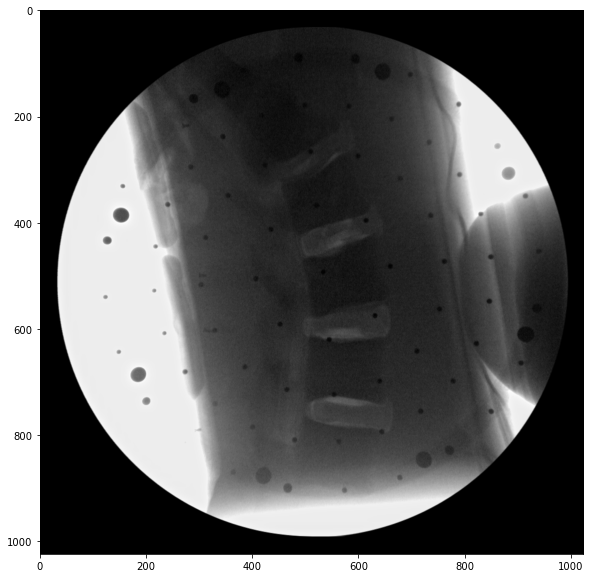

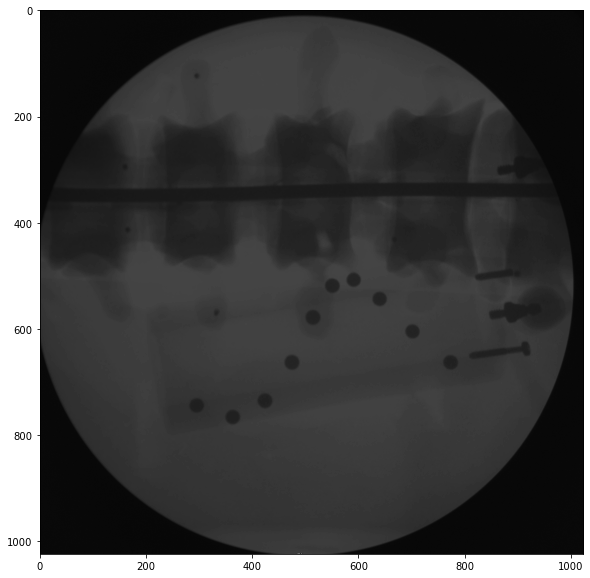

uint16
(1024, 1024)
uint16
(1024, 1024)


In [12]:
#reading image
IM3 = dicom.dcmread('IM3').pixel_array
plt.figure(figsize=(10,10))
plt.imshow(IM3,'gray')
plt.show()
img1_1 = dicom.dcmread('img1_1.DCM').pixel_array
plt.figure(figsize=(10,10))
plt.imshow(img1_1,'gray')
plt.show()
print(IM3.dtype)
print(IM3.shape)
print(img1_1.dtype)
print(img1_1.shape)

## CODE FOR IMADJUST

In [13]:
import bisect

def imadjust(src, tol=1, vin=[0,65535], vout=(0,65535)):
    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    assert len(src.shape) == 2 ,'Input image should be 2-dims'

    tol = max(0, min(100, tol))   
    if tol > 0:
        # Compute in and out limits
        # Histogram
        hist = np.histogram(src,bins=list(range(65536)),range=(0,65535))[0]

        # Cumulative histogram
        cum = hist.copy()
        for i in range(0, 65535): cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
        total = src.shape[0] * src.shape[1]
        low_bound = total * tol / 100
        upp_bound = total * (100 - tol) / 100
        vin[0] = bisect.bisect_left(cum, low_bound)
        vin[1] = bisect.bisect_right(cum, upp_bound)

    # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    vs[src<vin[0]]=0
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    dst = vd

    return dst

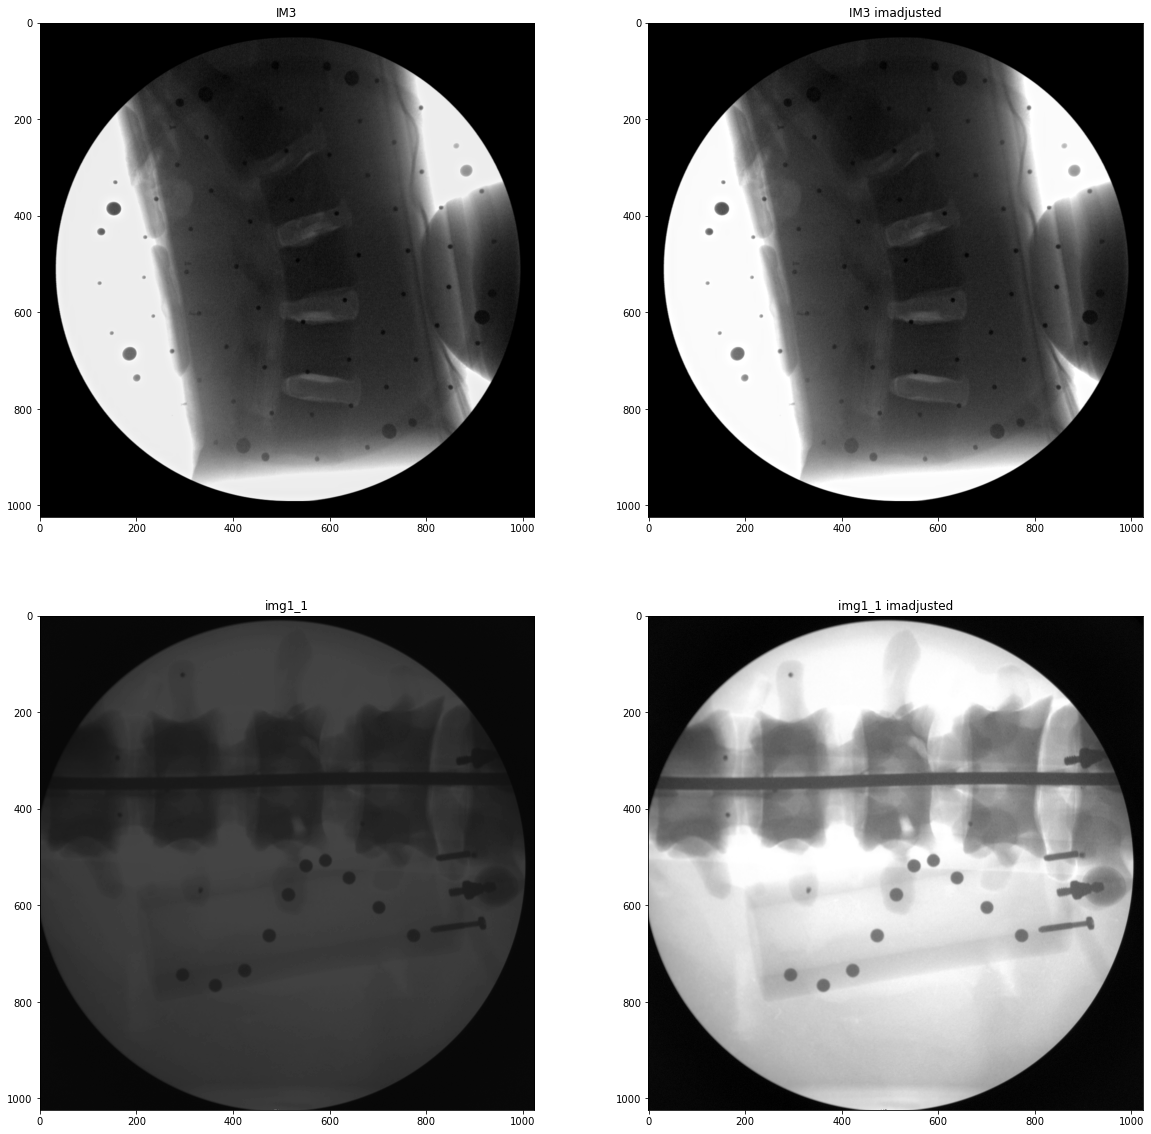

In [14]:
IM3_out = imadjust(IM3)
img1_1_out = imadjust(img1_1)
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(20,20))
ax1.set_title('IM3')
ax1.imshow(IM3,cmap = 'gray')
ax2.set_title('IM3 imadjusted')
ax2.imshow(IM3_out,cmap = 'gray')
ax3.set_title('img1_1')
ax3.imshow(img1_1,cmap = 'gray')
ax4.set_title('img1_1 imadjusted')
ax4.imshow(img1_1_out,cmap = 'gray')
plt.show()

## Taking one already adjusted image from MATLAB to compare

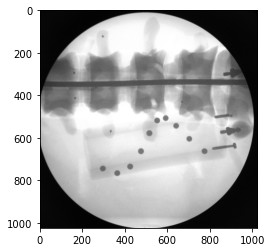

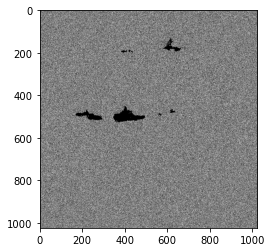

In [17]:
adjusted = dicom.dcmread('adjustedimage1.dcm').pixel_array
plt.imshow(adjusted,'gray')
plt.show()
np.shape(adjusted)
temp = img1_1_out-adjusted
temp.min(), temp.max()
plt.imshow(temp,'gray')